## CSCI E-89C Deep Reinforcement Learning, Spring 2020
### Section 1

## k-armed Bandit Problem: Random Actions

In the example below, we have two classes, Environment and Agent. The Environment has 4 possible actions in all states (there are no states actually in this case but states can be easily added to the class) and regardless of the Agent's action the Environment generates a reward from normal distribution with mean 6 and variance 1. The Agent can choose one of the actions available to it and picks them at random. Then we run the experiment for 100 time steps by calling rewards_hist(100) and observe historical rewards.

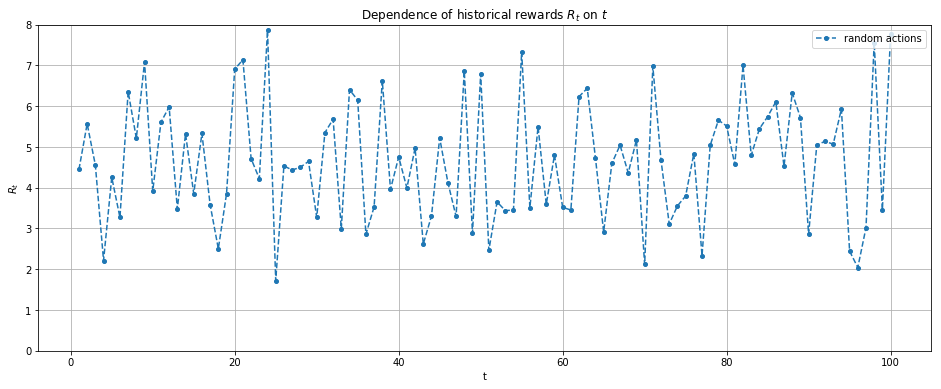

In [45]:
import random
from matplotlib import pyplot as plt 
import numpy as np

class Environment:
    def __init__(self):
        self.time = 1

    def admissible_actions(self):
        return list(range(1,5))

    def get_reward(self, action):
        self.time += 1
        return random.gauss(2+action,1)


class Agent:
    def __init__(self):
        self.current_reward = 0.0

    def step(self, env):
        actions = env.admissible_actions()
        reward = env.get_reward(random.choice(actions))
        self.current_reward = reward
        
        
def rewards_hist(T = 10):
    env = Environment()
    agent = Agent()
    rewards = []
    while env.time <= T:
        agent.step(env)
        rewards.append(agent.current_reward)
    return np.asarray(rewards)


from matplotlib import pyplot as plt 
import numpy as np   
np.random.seed(167)
T = 100

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),rewards_hist(T), linestyle='--', marker='o', markersize=4, label='random actions')
plt.xlabel("t")
plt.ylabel("$R_t$")
plt.title('Dependence of historical rewards $R_t$ on $t$')
plt.ylim(0, 8)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()

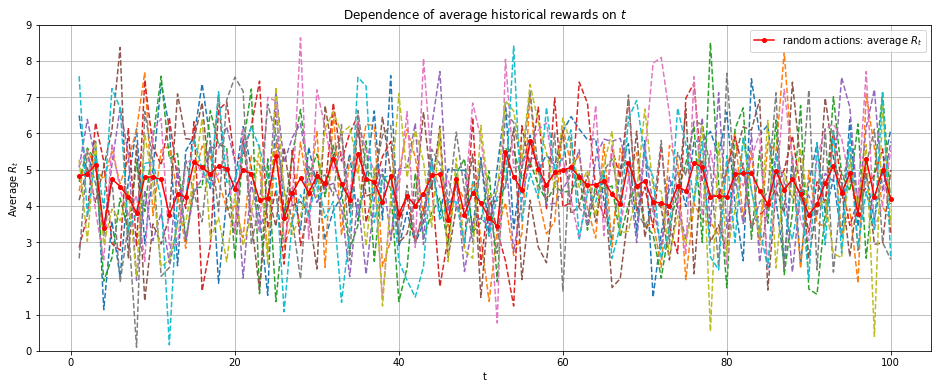

In [46]:
np.random.seed(167)
T = 100
episodes = 10

all_rewards = []
for i in range(1, episodes+1):
    all_rewards.append(rewards_hist(T))

all_rewards = np.asarray(all_rewards)
avg_rewards = (np.mean(all_rewards, axis=0))

plt.figure(figsize=(16,6))
plt.plot(range(1,T+1),np.transpose(all_rewards), linestyle='--', marker=None, markersize=4)
plt.plot(range(1,T+1),avg_rewards, linestyle='-', marker="o",color = "r", markersize=4, label='random actions: average $R_t$')
plt.xlabel("t")
plt.ylabel("Average $R_t$")
plt.title('Dependence of average historical rewards on $t$')
plt.ylim(0, 9)
plt.grid(True)
plt.legend(loc = 'upper right')
plt.show()
